In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os


In [3]:
data_dir = r"C:\Users\rishi\Desktop\best_model_beaky"

In [4]:
import os
import shutil
import random

# Set base path
input_folder = "."
classes = ["parrots", "house_crow"]
split_ratio = 0.8
output_folder = os.path.join(input_folder, "split_dataset")

# Make directories
for split in ["train", "test"]:
    for cls in classes:
        os.makedirs(os.path.join(output_folder, split, cls), exist_ok=True)

# Split and copy files
for cls in classes:
    cls_path = os.path.join(input_folder, cls)
    images = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
    random.shuffle(images)

    split_point = int(len(images) * split_ratio)
    train_imgs = images[:split_point]
    test_imgs = images[split_point:]

    for img in train_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(output_folder, "train", cls, img))
    for img in test_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(output_folder, "test", cls, img))

print("✅ Train-test split completed!")


✅ Train-test split completed!


In [5]:
# Updated paths (relative to BEST_MODEL_BEAKY)
train_dir = "split_dataset/train"
test_dir = "split_dataset/test"

# Image settings
img_size = (128, 128)
batch_size = 32

# Data generators
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)
    

In [6]:

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'categorical' for multi-class
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'categorical' for multi-class
)


Found 2564 images belonging to 2 classes.
Found 1266 images belonging to 2 classes.


In [7]:
# CNN Model for Multi-Class Classification
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Dropout(0.5),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Multi-class output with softmax activation
])

# Compile model with categorical crossentropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(train_data, validation_data=test_data, epochs=50)

c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 66s 774ms/step - accuracy: 0.5328 - loss: 1.4960 - val_accuracy: 0.7867 - val_loss: 0.5544
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 277ms/step - accuracy: 0.8087 - loss: 0.4520 - val_accuracy: 0.8531 - val_loss: 0.4637
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 270ms/step - accuracy: 0.8645 - loss: 0.3460 - val_accuracy: 0.8918 - val_loss: 0.3245
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - accuracy: 0.8782 - loss: 0.2790 - val_accuracy: 0.9226 - val_loss: 0.2389
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 272ms/step - accuracy: 0.8924 - loss: 0.2380 - val_accuracy: 0.8957 - val_loss: 0.2638
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - accuracy: 0.9194 - loss: 0.2170 - val_accuracy: 0.9194 - val_loss: 0.1989
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 280ms/step - accuracy: 0.9112 - loss: 0.1971 - val_accuracy: 0.9234 - val_loss: 0.1891
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 364ms/step - accuracy: 0.9297 - loss: 0.1647 - val_accu

In [9]:
# Evaluate accuracy and loss on test/validation set
loss, accuracy = model.evaluate(test_data)
print(f"📊 Validation Accuracy: {accuracy * 100:.2f}%")
print(f"🔻 Validation Loss: {loss:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9987 - loss: 0.0119
📊 Validation Accuracy: 99.92%
🔻 Validation Loss: 0.0094


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


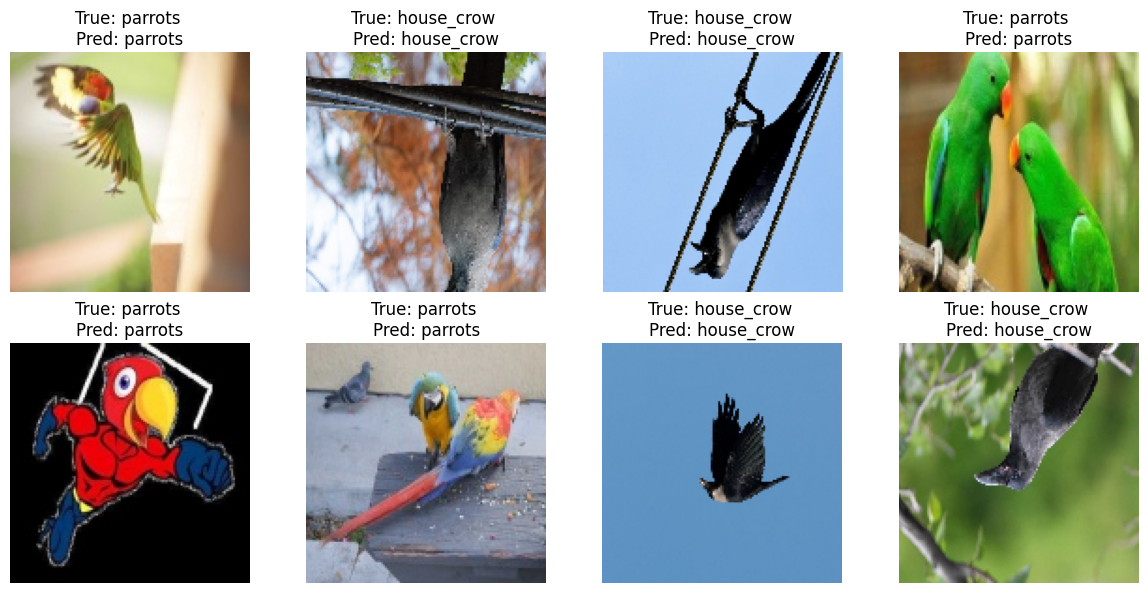

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ["house_crow", "parrots"]

# Get batch of validation images
images, labels = next(test_data)

# Predict the probabilities for each class
preds = model.predict(images)

# Get the predicted class index (the class with the highest probability)
pred_labels = np.argmax(preds, axis=1)

# Plot sample results
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    
    # Convert labels from one-hot encoding to class label for true label
    true_label = class_names[np.argmax(labels[i])]
    
    # Get the predicted label
    pred_label = class_names[pred_labels[i]]
    
    # Plot the true vs predicted label
    plt.title(f"True: {true_label} \nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


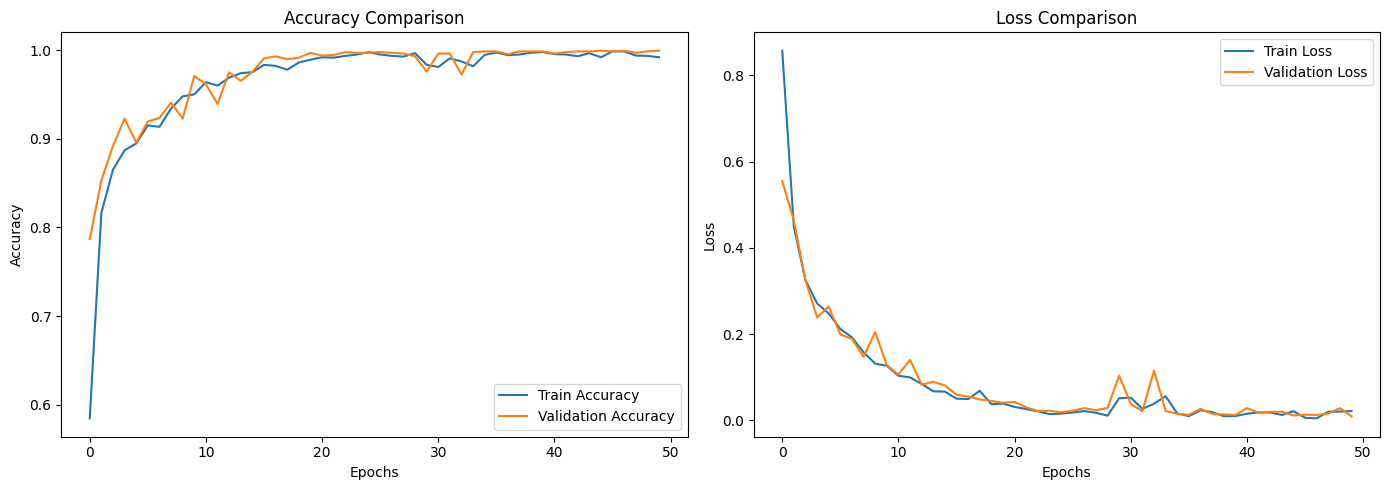

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
import tensorflow as tf

# Assuming you already have your model built
# model = your_model_here

# Direct conversion to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\rishi\AppData\Local\Temp\tmppsdvvgz4\assets


INFO:tensorflow:Assets written to: C:\Users\rishi\AppData\Local\Temp\tmppsdvvgz4\assets


Saved artifact at 'C:\Users\rishi\AppData\Local\Temp\tmppsdvvgz4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  1885485971984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1885485973328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1885485972944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1885485973136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1885485972176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1885405354640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1883346207376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1883346208912: TensorSpec(shape=(), dtype=tf.resource, name=None)
